In [9]:
!pip install yfinance
!pip install pystan==2.18.0.0
!pip install fbprophet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 50.0 MB 218 kB/s 
  Attempting uninstall: pystan
    Found existing installation: pystan 3.3.0
    Uninstalling pystan-3.3.0:
      Successfully uninstalled pystan-3.3.0
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached fbprophet-0.7.1.tar.gz (64 kB)
  Created wheel for fbprophet: filename=fbprophet-0.7.1-py3-none-any.whl size=6194877 sha256=4c10f7c58cc995e56dbd92bac9199ec52e08cd686671fc900f1ee6a7c8b1a3e6
  Stored in directory: /root/.cache/pip/wheels/cd/a1/12/db63ff624de492fe6cccf676091a0860fdde2ffde4bc3280e2
Successfully built fbprophet


In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from fbprophet import Prophet
import yfinance as yf
from pandas_datareader import data as pdr

In [15]:
stock = 'RAD'
start = '2021-08-20'
end = '2022-08-20'
df = yf.download(stock, start, end)
df.tail()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-08-15,11.00,11.19,10.73,10.86,10.86,1937400
2022-08-16,10.89,11.38,10.65,11.08,11.08,1600900
2022-08-17,10.97,11.34,10.45,10.51,10.51,1755600
2022-08-18,10.50,10.55,8.55,8.57,8.57,4823100
2022-08-19,8.43,8.60,7.70,7.70,7.70,5373100


In [17]:
df.shape

(252, 6)

In [16]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-08-20,15.050000,16.059999,15.03,16.040001,16.040001,1452900
2021-08-23,16.180000,16.920000,16.16,16.690001,16.690001,2346300
2021-08-24,16.850000,17.270000,16.48,16.990000,16.990000,2213800
2021-08-25,16.950001,17.440001,16.75,16.980000,16.980000,2203900
2021-08-26,17.010000,17.320000,16.48,16.510000,16.510000,1738800


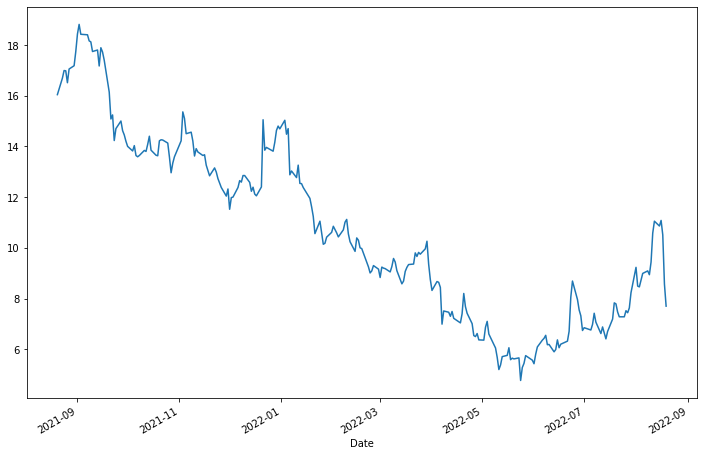

In [18]:
df['Adj Close'].plot(figsize=(12,8))
plt.show()

In [20]:
df = df.reset_index().rename(columns={'Date':'ds', 'Adj Close':'y'})

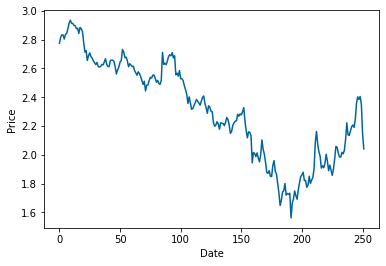

In [21]:
df['y'] = pd.DataFrame(np.log(df['y']))
ax = df['y'].plot(color='#006699');
ax.set_ylabel('Price');
ax.set_xlabel('Date');
plt.show()

In [22]:
df_train = df[:740]
df_test = df[740:]

In [28]:
mdl = Prophet(interval_width=0.95,daily_seasonality=True,yearly_seasonality=True)
mdl.fit(df_train)
future = mdl.make_future_dataframe(periods=24, freq='MS')

In [30]:
mdl = Prophet(interval_width=0.95, daily_seasonality=True,yearly_seasonality=True)
mdl.fit(df_train)
future = mdl.make_future_dataframe(periods=24, freq='MS')

In [31]:
forecast = mdl.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
271,2024-04-01,1.094838,0.983928,1.199670
272,2024-05-01,0.811839,0.708119,0.913142
273,2024-06-01,0.686949,0.583407,0.790171
274,2024-07-01,0.898881,0.795697,1.003148
275,2024-08-01,1.073488,0.968224,1.178152


In [32]:
forecast['yhat_lower'].head()

0    2.725656
1    2.736941
2    2.746656
3    2.734277
4    2.736085
Name: yhat_lower, dtype: float64

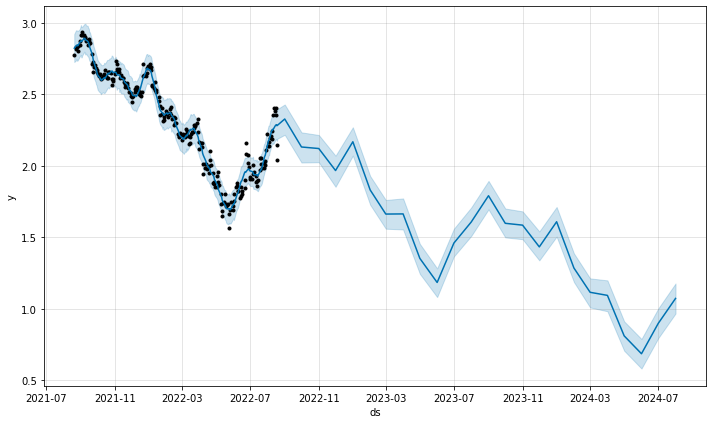

In [33]:
mdl.plot(forecast);
plt.show()

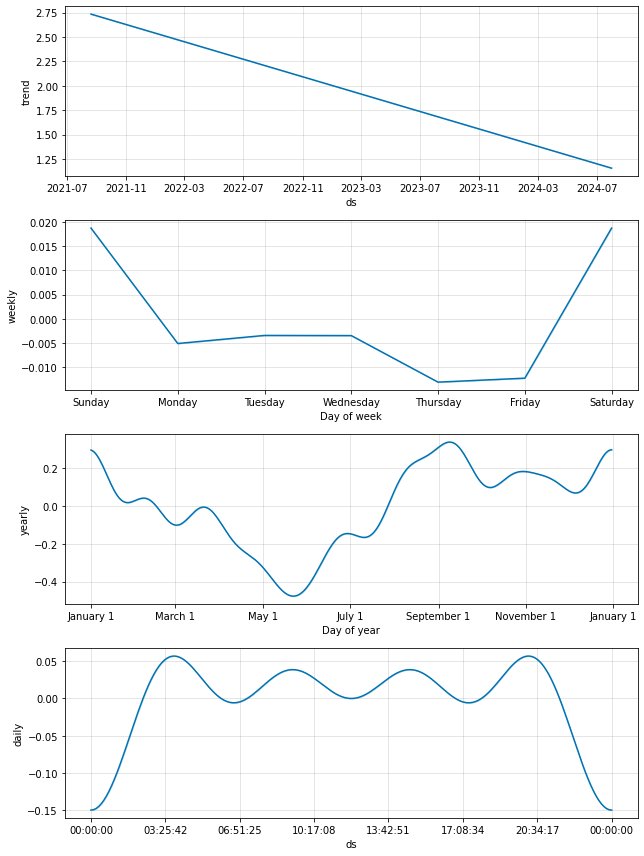

In [34]:
mdl.plot_components(forecast)
plt.show()

In [35]:
import math
y_hat = np.exp(forecast['yhat'][740:])
y_true = np.exp(df['y'])
mse = ((y_hat - y_true) ** 2).mean()
print('Prediction quality: {:.2f} MSE ({:.2f} RMSE)'.format(mse, math.sqrt(mse)))

Prediction quality: nan MSE (nan RMSE)


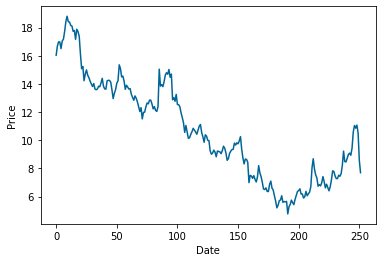

In [36]:
plt.plot(y_true, label='Original', color='#006699');
plt.plot(y_hat, color='#ff0066', label='Forecast');
plt.ylabel('Price');
plt.xlabel('Date');
plt.show()